## The Sparks Foundation Internship

## Predict the optimum number of clusters and represent it visually

## Batch : #GRIPFEBRUARY24

## Author : J Suganya

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Dataset

In [81]:
df=pd.read_csv('Iris.csv')
df.head(5) ## ist five rows of the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.size

900

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
num=df.select_dtypes(include=np.number).columns.to_list()
num

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [8]:
col=df.select_dtypes(include=object).columns.to_list()
col

['Species']

In [82]:
df=df.drop(['Id','Species'],axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.isnull().sum()/df.shape[0]*100

SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
dtype: float64

## Univariant Analysis

In [13]:
df.skew()

SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [14]:
## petallength and petalwidth are slightly negative skewed where as sepallength and sepal width are slightly positively skewed

In [16]:
df.kurt()

SepalLengthCm   -0.552064
SepalWidthCm     0.290781
PetalLengthCm   -1.401921
PetalWidthCm    -1.339754
dtype: float64

## visualize the distribution of all the numerical columns

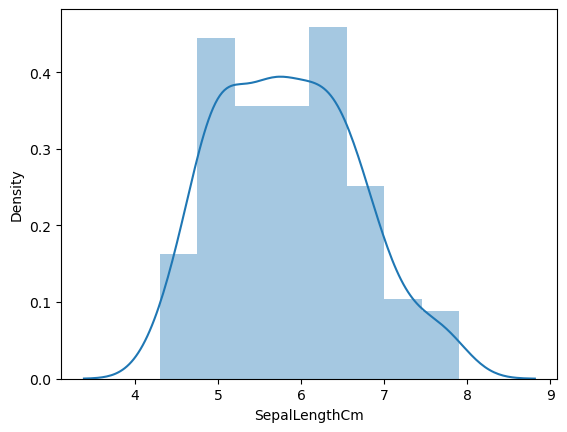

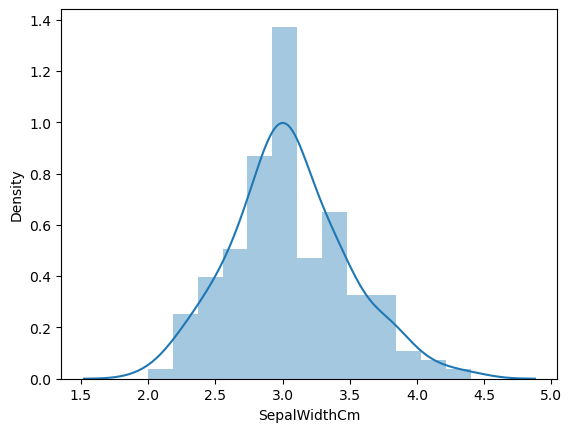

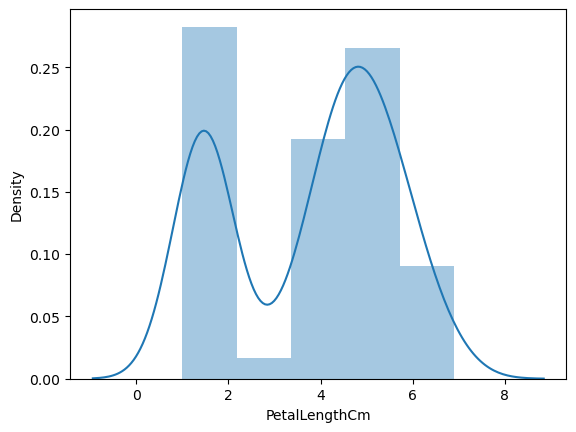

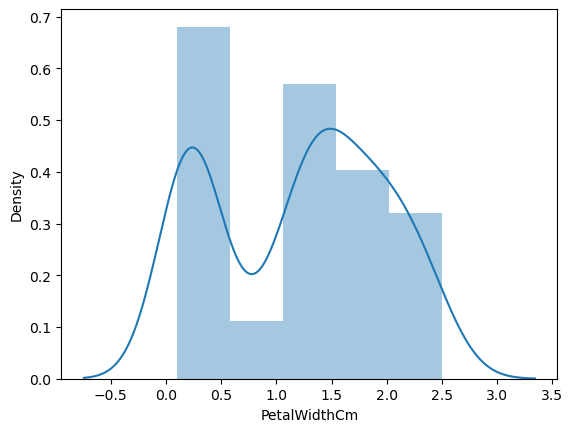

In [18]:
for i in df:
    sns.distplot(df[i])
    plt.show()

## Outliers

In [19]:
def finding_outliers(data):
    outliers=[]
    data=sorted(data)
    
    q1=np.percentile(data,25)
    q3=np.percentile(data,75)
    
    IQR=q3-q1
    
    ll=q1-(1.5*IQR)
    ul=q3+(1.5*IQR)
    
    for i in data:
        if (i<ll or i>ul):
            outliers.append(i)
    return outliers


for i in df:
    outliers_list=finding_outliers(df[i])
    print('outliers in',i,'feature :',outliers_list)

outliers in SepalLengthCm feature : []
outliers in SepalWidthCm feature : [2.0, 4.1, 4.2, 4.4]
outliers in PetalLengthCm feature : []
outliers in PetalWidthCm feature : []


In [ ]:
## ## here we could find 4 outliers in feature named SepalWidthCm with , 
## here it is only 150 rows in number so im not going to treat it .

## Bivariant Analysis

## Numerical Vs Numerical

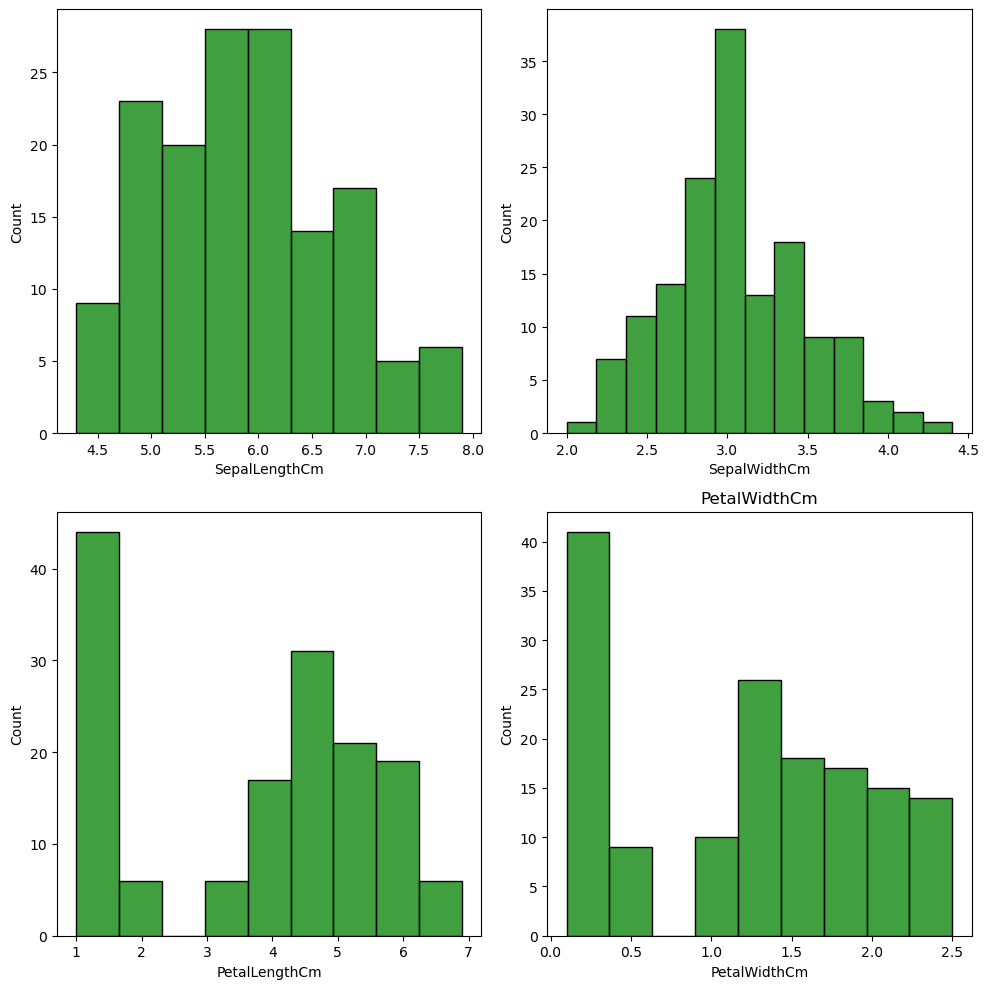

In [21]:
fig,ax=plt.subplots(2,2 , figsize=(10,10))

for i ,subplot in zip(df,ax.flatten()):
    sns.histplot(df[i],ax=subplot,color='green')
    plt.title(i)
plt.tight_layout()    
plt.show()

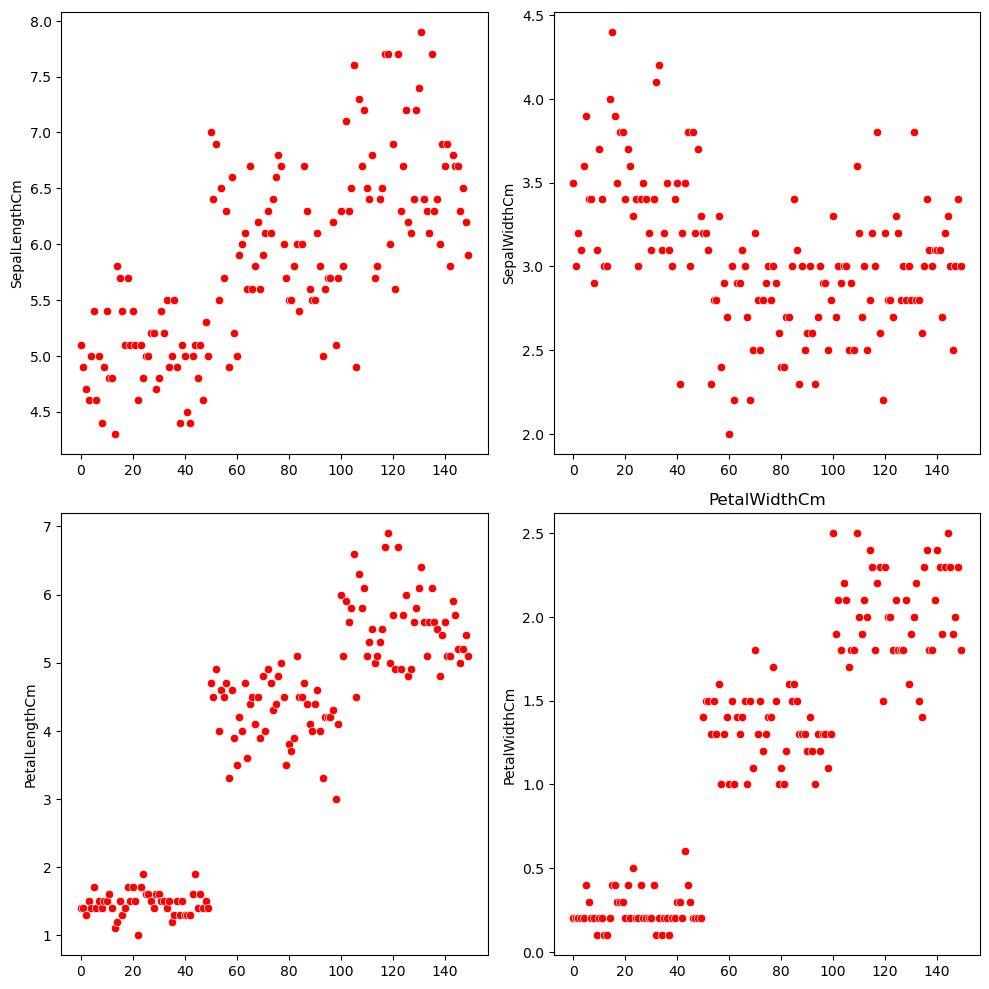

In [22]:
fig,ax=plt.subplots(2,2 , figsize=(10,10))

for i ,subplot in zip(df,ax.flatten()):
    sns.scatterplot(df[i],ax=subplot,color='red')
    plt.title(i)
plt.tight_layout()    
plt.show()

## heatmap

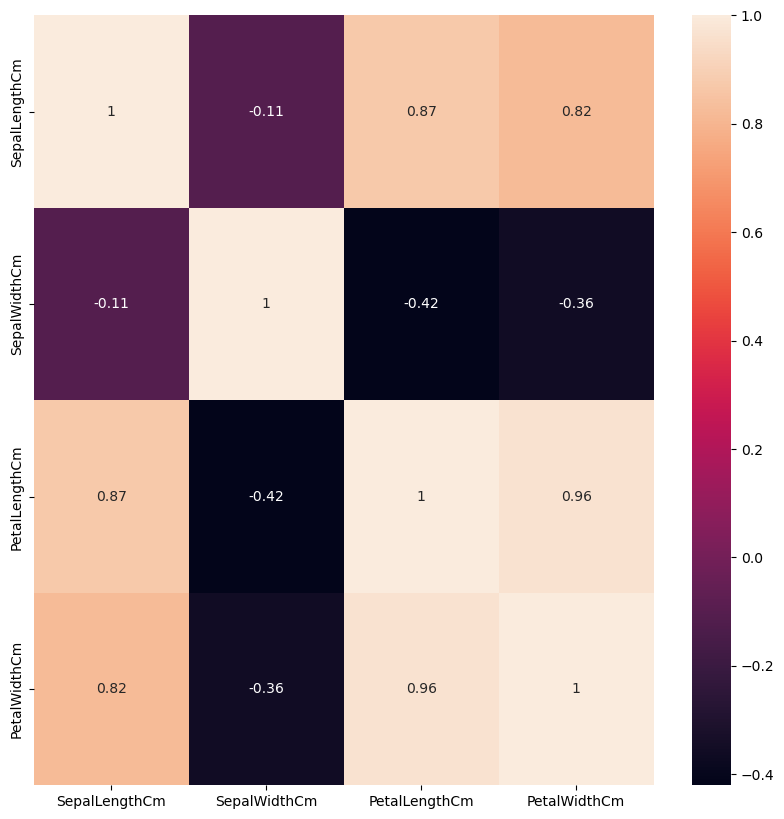

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [25]:
## ## we could see multicollinearity between independend variable 

In [26]:
df.cov()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,0.685694,-0.039268,1.273682,0.516904
SepalWidthCm,-0.039268,0.188004,-0.321713,-0.117981
PetalLengthCm,1.273682,-0.321713,3.113179,1.296387
PetalWidthCm,0.516904,-0.117981,1.296387,0.582414


In [ ]:
## After checking for correlation , covariance for numerical data. there is corr ,cov then  we can do PCA

## SCALING

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
cols=df.columns.to_list()
cols

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [85]:
ss = StandardScaler()
df=ss.fit_transform(df)

In [86]:
df_sc=pd.DataFrame(df,columns=cols)
df_sc

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


## PCA

In [87]:
cov_mat = np.cov(df_sc.T)  # find the covariance matrix with transpose of the scaled data
cov_mat

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [88]:
eig_val,eig_vec = np.linalg.eig(cov_mat) # find eigen value , eigen vector
eig_val,eig_vec

(array([2.93035378, 0.92740362, 0.14834223, 0.02074601]),
 array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
        [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
        [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
        [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]]))

In [89]:
eig_val = list(eig_val)
eig_val

[2.930353775589313,
 0.9274036215173417,
 0.1483422264816399,
 0.020746013995595784]

In [90]:
percentage = []

for i in eig_val:
    per = (i/np.sum(eig_val))*100
    percentage.append(per)

In [91]:
percentage

[72.77045209380131, 23.030523267680664, 3.6838319576273926, 0.515192680890629]

In [92]:
cum_sum = np.cumsum(percentage)
cum_sum

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

In [93]:
len(cum_sum[cum_sum<99.2])

2

In [94]:
from sklearn.decomposition import PCA

In [95]:
pca = PCA (n_components=2,random_state=10)
pca

PCA(n_components=2, random_state=10)

In [96]:
pca_df = pca.fit_transform(df_sc)

pca = pd.DataFrame(pca_df , columns = ['pca1','pca2'])
pca

,pca1,pca2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


## KMeans

In [98]:
from sklearn.cluster import KMeans

In [99]:
wcss=[]

for i in range(2,11):
    km= KMeans(n_clusters = i , random_state=10)
    km.fit(pca)
    wcss.append(km.inertia_)

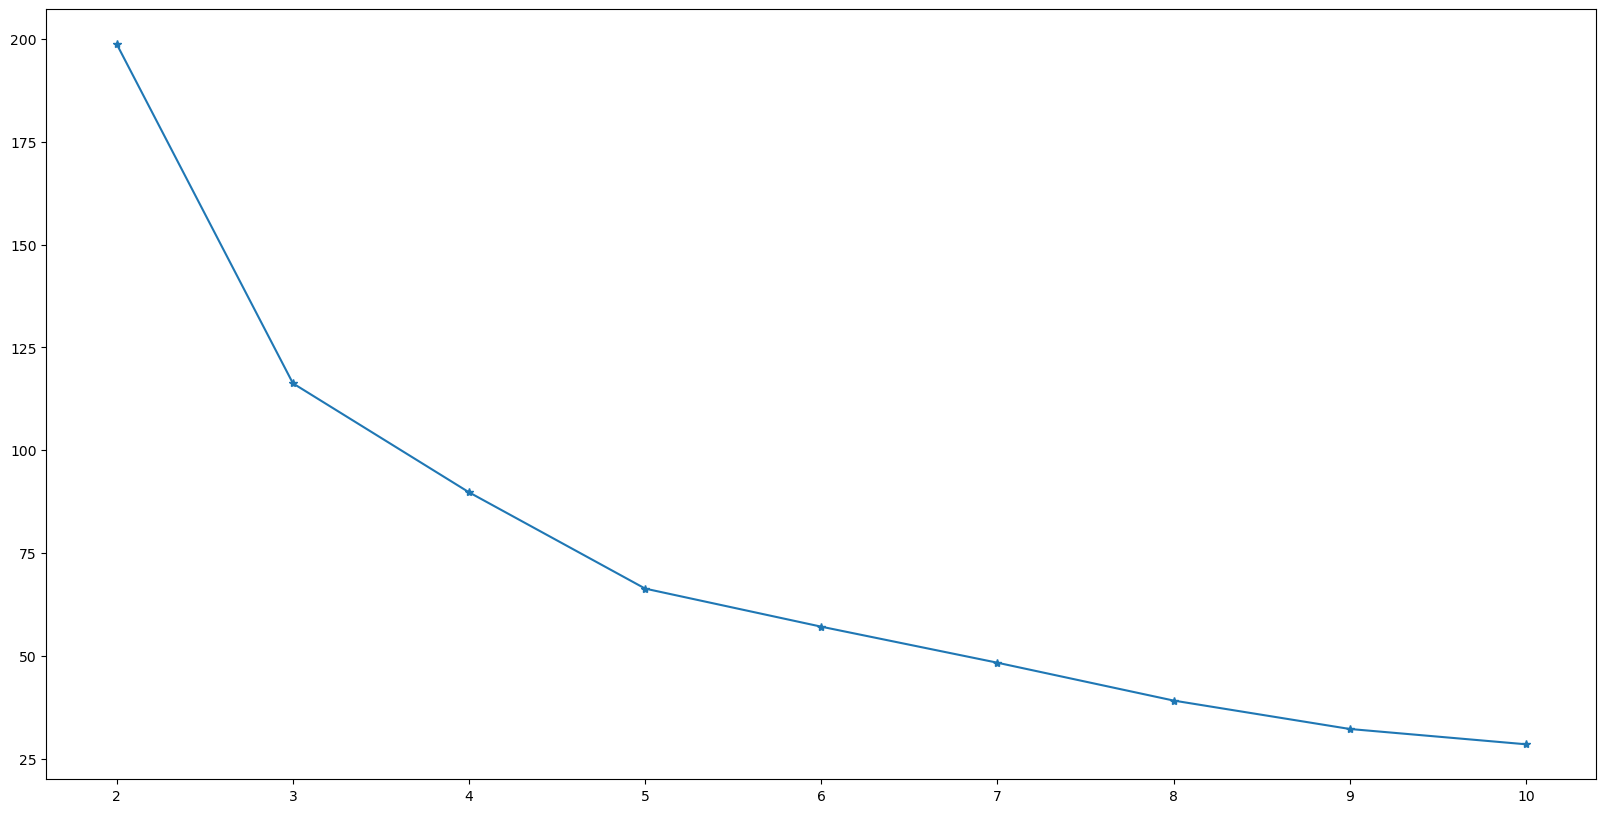

In [100]:
plt.plot(range(2,11),wcss,marker='*')
plt.show()

In [101]:
from sklearn.metrics import silhouette_score

In [105]:
for i in range(3,11):
    km=KMeans(n_clusters= i , random_state=10)
    k_pred= km.fit_predict(pca)
    score= silhouette_score(pca,k_pred,random_state=10)
    print('silhouette_score',i,'is',score)

silhouette_score 3 is 0.5104464148144476
silhouette_score 4 is 0.44181639469165457
silhouette_score 5 is 0.4150571398941666
silhouette_score 6 is 0.433675204300864
silhouette_score 7 is 0.42538968353415385
silhouette_score 8 is 0.4499854222143655
silhouette_score 9 is 0.44209866312992535
silhouette_score 10 is 0.4384556487952672


In [67]:
## The optimum cluster value is 3

In [106]:
model1 = KMeans(n_clusters=3,random_state=10)
model1.fit(pca)

KMeans(n_clusters=3, random_state=10)

In [107]:
model1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [108]:
pca['K Means']= model1.labels_

In [109]:
pca

,pca1,pca2,K Means
0,-2.264542,0.505704,1
1,-2.086426,-0.655405,1
2,-2.367950,-0.318477,1
3,-2.304197,-0.575368,1
4,-2.388777,0.674767,1
...,...,...,...
145,1.870522,0.382822,2
146,1.558492,-0.905314,0
147,1.520845,0.266795,2
148,1.376391,1.016362,2


In [110]:
center1 = model1.cluster_centers_
center1

array([[ 0.61198392, -0.79925263],
       [-2.22019328,  0.29222482],
       [ 1.71890108,  0.65217008]])

## Agglomerative

In [111]:
from sklearn.cluster import AgglomerativeClustering

In [112]:
from scipy.cluster.hierarchy import linkage,dendrogram

In [113]:
link = linkage(pca,method='ward')
link

array([[9.00000000e+00, 3.40000000e+01, 0.00000000e+00, 2.00000000e+00],
       [3.70000000e+01, 1.50000000e+02, 0.00000000e+00, 3.00000000e+00],
       [1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [5.80000000e+01, 1.38000000e+02, 1.14455591e-02, 2.00000000e+00],
       [1.12000000e+02, 1.45000000e+02, 3.43721547e-02, 2.00000000e+00],
       [1.00000000e+00, 4.50000000e+01, 3.81532415e-02, 2.00000000e+00],
       [1.90000000e+01, 4.60000000e+01, 4.19668673e-02, 2.00000000e+00],
       [1.20000000e+02, 1.43000000e+02, 4.28063580e-02, 2.00000000e+00],
       [0.00000000e+00, 4.00000000e+01, 4.36528547e-02, 2.00000000e+00],
       [1.70000000e+01, 2.70000000e+01, 4.36528547e-02, 2.00000000e+00],
       [8.80000000e+01, 9.50000000e+01, 4.36528547e-02, 2.00000000e+00],
       [1.39000000e+02, 1.41000000e+02, 5.13974123e-02, 2.00000000e+00],
       [1.16000000e+02, 1.47000000e+02, 5.13974123e-02, 2.00000000e+00],
       [2.80000000e+01, 3.90000000e+01, 5.33190767e

In [114]:
for i in range(3,11):
    agg = AgglomerativeClustering(n_clusters= i)
    agg_pred = agg.fit_predict(pca)
    score = silhouette_score(pca,agg_pred,random_state=10)
    print("Sil score of ",i,"is",score)
    

Sil score of  3 is 0.6448344539091799
Sil score of  4 is 0.5899920988643982
Sil score of  5 is 0.5091719595284953
Sil score of  6 is 0.414670245418802
Sil score of  7 is 0.41352044629699725
Sil score of  8 is 0.4021629962907087
Sil score of  9 is 0.4209544827951063
Sil score of  10 is 0.4233530295227208


In [120]:
model2 = AgglomerativeClustering(n_clusters=3)
model2.fit(pca)

AgglomerativeClustering(n_clusters=3)

In [121]:
model2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

In [122]:
pca['Agg'] = model2.labels_

In [123]:
pca

,pca1,pca2,K Means,Agg
0,-2.264542,0.505704,1,0
1,-2.086426,-0.655405,1,0
2,-2.367950,-0.318477,1,0
3,-2.304197,-0.575368,1,0
4,-2.388777,0.674767,1,0
...,...,...,...,...
145,1.870522,0.382822,2,2
146,1.558492,-0.905314,0,1
147,1.520845,0.266795,2,2
148,1.376391,1.016362,2,2


In [124]:
plt.rcParams['figure.figsize'] = [20,10]

<Axes: xlabel='pca1', ylabel='pca2'>

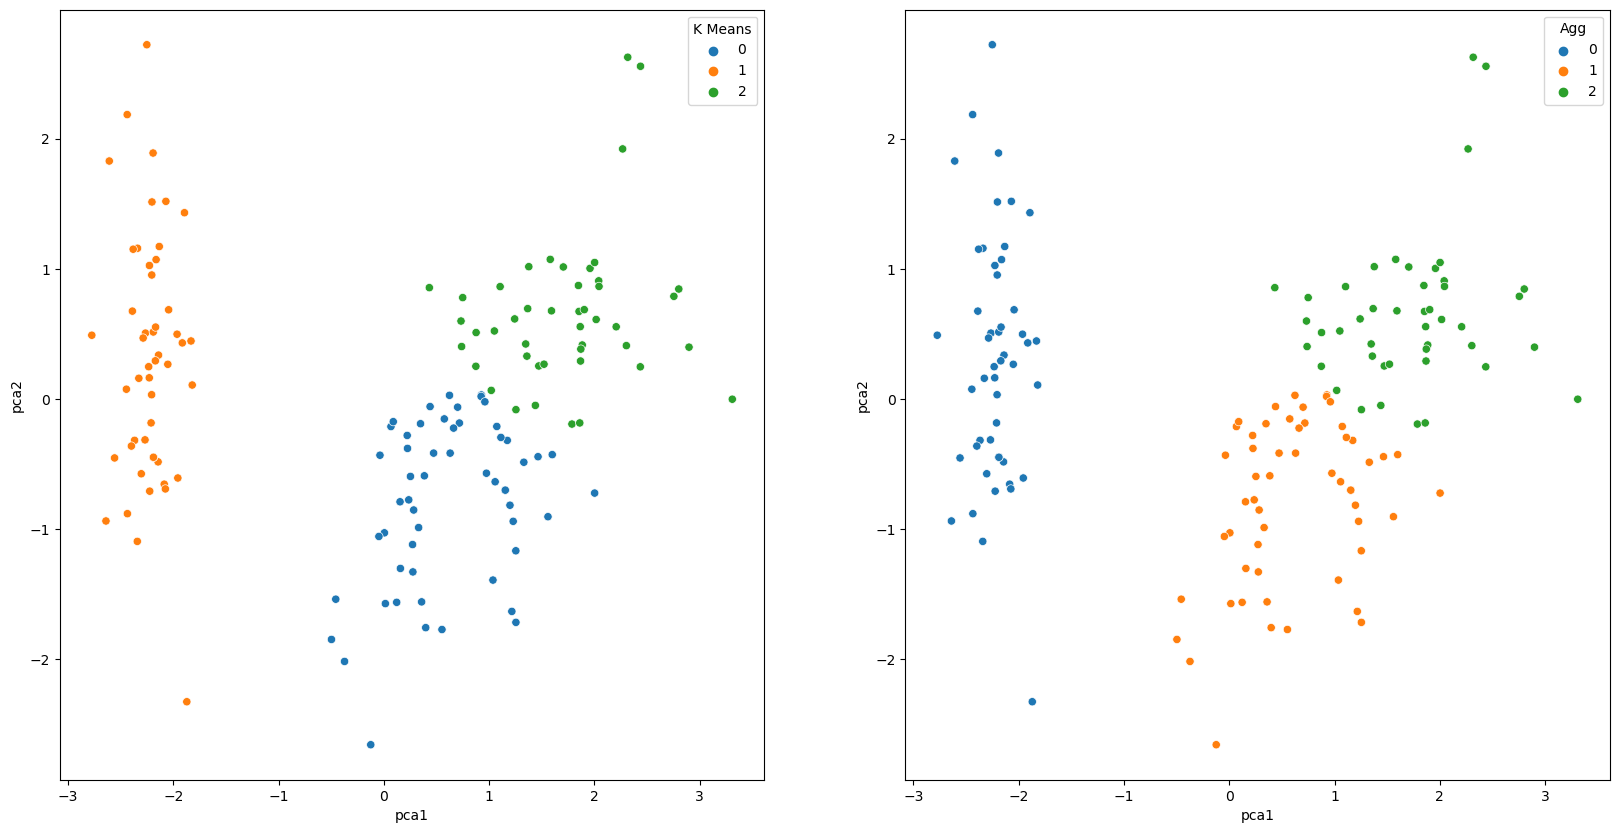

In [125]:
plt.subplot(1,2,1)

sns.scatterplot(x=pca['pca1'],y=pca['pca2'],hue=pca['K Means'],palette="tab10")

plt.subplot(1,2,2)

sns.scatterplot(x=pca['pca1'],y=pca['pca2'],hue=pca['Agg'],palette="tab10")